<h3><i>Importing Libraries</i></h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<h3><i>Importing Dataset</i></h3>

Source: <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Dataset</a>

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h3><i>Checking for null values</i></h3>

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking for Datatypes

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Blank data Observed

In [6]:
df["TotalCharges"].sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

#Converting to numeric format

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df["TotalCharges"].sort_values()

1654    18.80
6489    18.85
1151    18.85
4939    18.90
583     19.00
        ...  
3826      NaN
4380      NaN
5218      NaN
6670      NaN
6754      NaN
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
#Removing missing values 
df.dropna(inplace = True)

<i>Since, Customer ID doesn't play a major role, Droping Customer ID column</i>

In [11]:
del df['customerID']

In [12]:
df2 = df

<i>Translating</i>

In [13]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

<i>Converting Categorial Data into Dummy Data</i>

In [14]:
df3 = pd.get_dummies(df2)

In [15]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [16]:
df3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

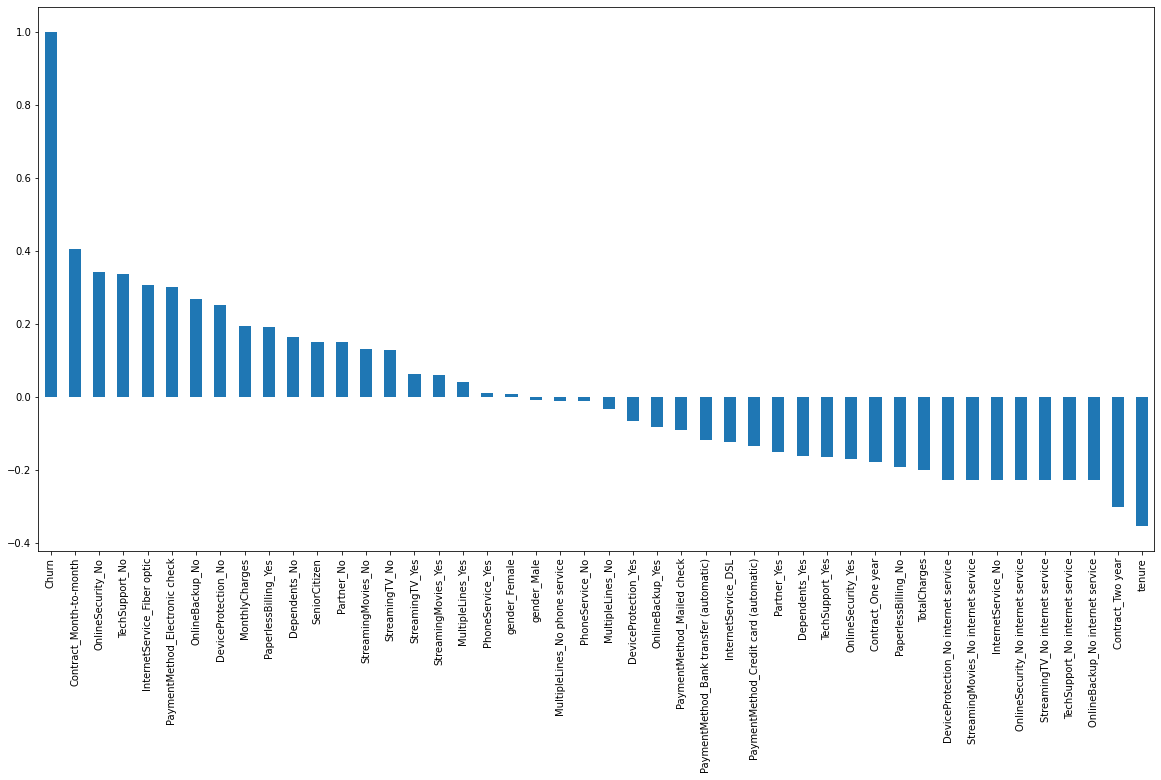

In [17]:
plt.figure(figsize=(20,10))
df3.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

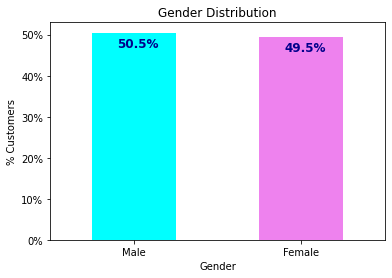

In [18]:

ax = (df2['gender'].value_counts()*100.0 / len(df3)).plot(kind='bar', stacked=True, rot=0, color=['cyan', 'violet'])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())


total = sum(totals)

for i in ax.patches:

    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%', fontsize=12, color='darkblue', weight='bold')


In [19]:
df3.Churn.replace({"Yes":1, "No":0}, inplace = True)

df3.to_csv('churn_data.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

Working with Linear Regression

In [20]:
y = df3.Churn.values
X = df3.drop('Churn', axis = 1)
cols = X.columns

In [21]:

mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))
X.columns = cols

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [40]:
print(X_test)

      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
3506            1.0  0.704225        0.067164      0.143307            0.0   
126             1.0  0.366197        0.595025      0.244253            1.0   
6808            1.0  0.760563        0.801493      0.646082            0.0   
3586            0.0  0.000000        0.272637      0.003098            1.0   
920             0.0  0.211268        0.568657      0.135080            0.0   
...             ...       ...             ...           ...            ...   
5375            0.0  0.042254        0.459204      0.027025            1.0   
3514            0.0  0.211268        0.013433      0.034116            1.0   
106             0.0  1.000000        0.854726      0.840555            1.0   
2463            0.0  0.042254        0.301493      0.021025            0.0   
2412            0.0  0.126761        0.174129      0.042811            0.0   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Depe

In [23]:


logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')

logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [24]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    4256
1    1018
dtype: int64
----------------------------------
0    0.806978
1    0.193022
dtype: float64


In [25]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1400
1     358
dtype: int64
---------------------------------
0    0.796359
1    0.203641
dtype: float64


In [31]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import confusion_matrix

# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)

In [32]:
def print_metrics(y_train, y_hat_train, y_test, y_hat_test):
    print('Training Metrics:')
    print(f'Training Precision: ', round(precision_score(y_train, y_hat_train), 2))
    print(f'Training Recall: ', round(recall_score(y_train, y_hat_train), 2))
    print(f'Training Accuracy: ', round(accuracy_score(y_train, y_hat_train), 2))
    print(f'Training F1-Score: ', round(f1_score(y_train, y_hat_train), 2))
    print('\n')
    print(f'Testing Metrics:')
    print(f'Testing Precision: ', round(precision_score(y_test, y_hat_test),2))
    print(f'Testing Recall: ', round(recall_score(y_test, y_hat_test),2))
    print(f'Testing Accuracy: ', round(accuracy_score(y_test, y_hat_test),2))
    print(f'Testing F1-Score: ', round(f1_score(y_test, y_hat_test),2))

In [33]:

cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)   

print_metrics(y_train, y_hat_train, y_test, y_hat_test)


Confusion Matrix: 
 [[1161  131]
 [ 227  239]]
Training Metrics:
Training Precision:  0.66
Training Recall:  0.56
Training Accuracy:  0.81
Training F1-Score:  0.61


Testing Metrics:
Testing Precision:  0.65
Testing Recall:  0.51
Testing Accuracy:  0.8
Testing F1-Score:  0.57
